In [1]:
import os
from pycocotools.coco import COCO

dataDir = ''
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
print(instances_annFile)
coco = COCO(instances_annFile)

captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

ids = list(coco.anns.keys())

annotations/instances_val2014.json
loading annotations into memory...
Done (t=5.25s)
creating index...
index created!
loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


http://images.cocodataset.org/val2014/COCO_val2014_000000400887.jpg


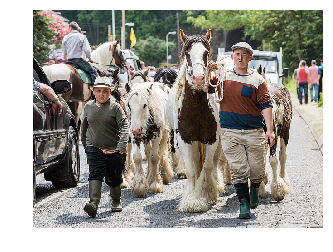

A man walking a horse next to a boy walking another horse.
a man and a boy leading a group of horses down the road
an image of a group of kids riding on their horses
A couple of boys walking a group of very large horses down a busy street.
Young boys are leading small horses along a procession.


In [20]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [21]:
import sys
import pycocotools
from pycocotools.coco import COCO
!pip install nltk
import nltk
nltk.download('punkt')

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from data_loader import get_loader
from torchvision import transforms

vocab_threshold = 3

batch_size = 10

transform_train = transforms.Compose([ 
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),
                         (0.229, 0.224, 0.225))])

data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=10,
                         vocab_threshold=5,
                         vocab_from_file=False)

Path /Users/user/ImageCaptioning
cocoapi/PythonAPI/annotations/captions_train2014.json
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.56s)
creating index...


  0%|          | 1648/414113 [00:00<00:50, 8236.05it/s]

index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:44<00:00, 9340.32it/s]


In [24]:
% load_ext autoreload
% autoreload 2

from model import EncoderCNN, DecoderRNN
import torch

images, captions = next(iter(data_loader))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
embed_size = 256

encoder = EncoderCNN(embed_size)
encoder.to(device)
    
images = images.to(device)

features = encoder(images)

print('type(outputs):', type(features))
print('outputs.shape:', features.shape)

assert type(features)==torch.Tensor, "Encoder output needs to be a PyTorch Tensor." 
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 256])


In [30]:
hidden_size = 512
vocab_size = len(data_loader.dataset.vocab)

decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

decoder.to(device)
    
captions = captions.to(device)
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

assert type(outputs)==torch.Tensor, "Decoder output needs to be a PyTorch Tensor."
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "The shape of the decoder output is incorrect."

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 13, 8855])
